In [88]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plyt
import plotly.express as px
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from shapely.geometry import Point, LineString

In [89]:
df = pd.read_csv('merged.csv')

print(df)

       longitude   latitude                  timestamp   xacc   yacc  speed  \
0     149.001999 -35.762268  2022-01-03T12:49:36+11:00 -0.622 -0.255   29.0   
1     149.054108 -35.326000  2020-07-01T12:17:01+10:00  1.394 -0.600   64.0   
2     149.063189 -35.320256  2023-01-25T17:32:38+11:00 -1.114  0.017   27.0   
3     149.062775 -35.320061  2021-06-23T17:33:19+10:00 -0.976  0.396   17.0   
4     149.062378 -35.313324  2021-03-04T08:55:16+11:00 -0.896  0.003   67.0   
...          ...        ...                        ...    ...    ...    ...   
6694  149.289459 -35.336906  2020-10-27T04:06:31+11:00 -0.112 -0.421   94.0   
6695  149.289154 -35.336918  2022-02-07T06:43:09+11:00 -0.078 -0.428   93.0   
6696  149.290756 -35.337002  2020-12-11T21:29:54+11:00 -0.409 -0.058   87.0   
6697  149.274216 -35.346287  2021-01-21T15:10:31+11:00 -0.057 -0.404  107.0   
6698  149.409001 -35.305583  2022-12-06T06:35:53+11:00 -0.180 -0.364   97.0   

      maxspeed  lanecount classification  
0       

In [90]:
df.head()

longitude   latitude                  timestamp   xacc   yacc  speed  \
0  149.001999 -35.762268  2022-01-03T12:49:36+11:00 -0.622 -0.255   29.0   
1  149.054108 -35.326000  2020-07-01T12:17:01+10:00  1.394 -0.600   64.0   
2  149.063189 -35.320256  2023-01-25T17:32:38+11:00 -1.114  0.017   27.0   
3  149.062775 -35.320061  2021-06-23T17:33:19+10:00 -0.976  0.396   17.0   
4  149.062378 -35.313324  2021-03-04T08:55:16+11:00 -0.896  0.003   67.0   

   maxspeed  lanecount classification  
0      62.0          1        Braking  
1      83.0          4       Steering  
2      48.0          2        Braking  
3      22.0          1        Braking  
4      95.0          2        Braking

In [91]:
df.classification.unique()

array(['Braking', 'Steering', 'Combined'], dtype=object)

In [92]:
df.lanecount.unique()

array([1, 4, 2, 3, 5, 6, 7], dtype=int64)

In [93]:
lanecountClass = df[["lanecount", "classification"]].copy()
lanecountClass

lanecount classification
0             1        Braking
1             4       Steering
2             2        Braking
3             1        Braking
4             2        Braking
...         ...            ...
6694          1       Steering
6695          1       Steering
6696          1        Braking
6697          2       Steering
6698          1       Steering

[6699 rows x 2 columns]

In [94]:
df['xacc'].describe()

count    6699.000000
mean       -0.301323
std         0.340357
min        -1.962000
25%        -0.619000
50%        -0.257000
75%        -0.090000
max         1.714000
Name: xacc, dtype: float64

In [95]:
df['yacc'].describe()

count    6699.000000
mean        0.041516
std         0.488534
min        -1.096000
25%        -0.519000
50%         0.007000
75%         0.601000
max         1.052000
Name: yacc, dtype: float64

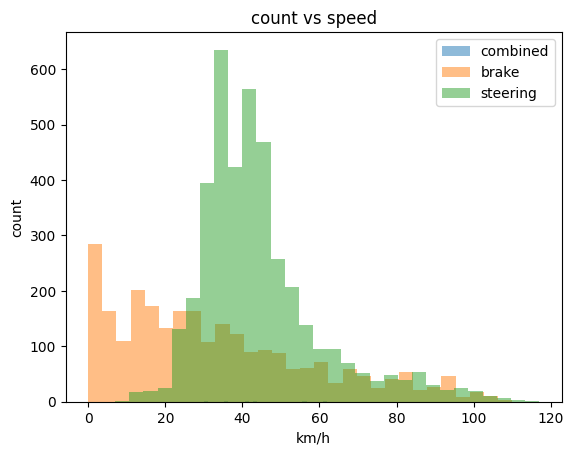

In [96]:
#occurences vs speed histogram, separated by classification
combined_speed_count = df[df["classification"] == "Combined"]
plyt.hist(combined_speed_count["speed"], bins=30, alpha=0.5, label="combined")

brake_speed_count = df[df["classification"] == "Braking"]
plyt.hist(brake_speed_count["speed"], bins=30, alpha=0.5, label="brake")

steering_speed_count = df[df["classification"] == "Steering"]
plyt.hist(steering_speed_count["speed"], bins=30, alpha=0.5, label="steering")

plyt.legend(loc="upper right")
plyt.title("count vs speed")
plyt.xlabel("km/h")
plyt.ylabel("count")
plyt.show()


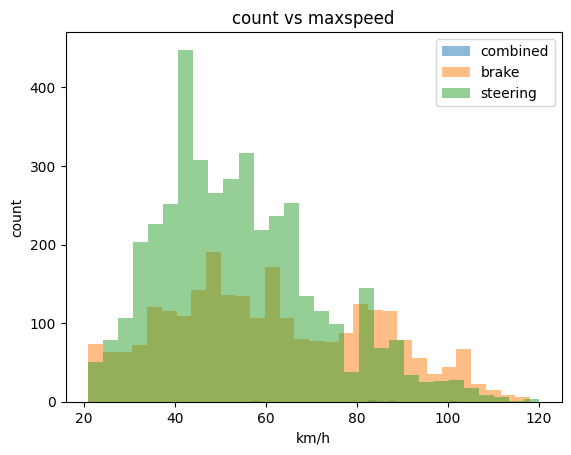

In [97]:
#occurences vs max speed histogram, separated by classification
combined_max_speed_count = df[df["classification"] == "Combined"]
plyt.hist(combined_speed_count["maxspeed"], bins=30, alpha=0.5, label="combined")

brake_max_speed_count = df[df["classification"] == "Braking"]
plyt.hist(brake_speed_count["maxspeed"], bins=30, alpha=0.5, label="brake")

steering_max_speed_count = df[df["classification"] == "Steering"]
plyt.hist(steering_speed_count["maxspeed"], bins=30, alpha=0.5, label="steering")

plyt.legend(loc="upper right")
plyt.title("count vs maxspeed")
plyt.xlabel("km/h")
plyt.ylabel("count")
plyt.show()

In [98]:
#xacc vs yacc
XYacc = px.scatter(df, x="xacc", y="yacc", color="classification", title="Xacc v Yacc")
XYacc.show()

In [99]:
#xacc vs yacc vs speed
def kmh_to_ms(x):
    return x / 3.6


df_converted = df.assign(speed_ms=lambda x: kmh_to_ms(x['speed']),
                         max_speed_ms=lambda x: kmh_to_ms(x['maxspeed']))

XYacc_Speed = px.scatter_3d(df_converted, x="xacc", y="yacc", z="speed_ms", color="classification", title="Xacc v Yacc v Speed")
XYacc_Speed.show()

In [100]:
#xacc vs yacc vs maxspeed
XYacc_Maxspeed = px.scatter_3d(df_converted, x="xacc", y="yacc", z="max_speed_ms", color="classification", title="Xacc v Yacc v Max Speed")
XYacc_Maxspeed.show()

In [101]:
#braking only (speed)
brake_xyacc_speed = px.scatter_3d(brake_speed_count, x="xacc", y="yacc", z="speed", color="speed", title="Xacc v Yacc v Speed (Brake)")
brake_xyacc_speed.show()

In [102]:
#braking only (max speed)
brake_xyacc_maxspeed = px.scatter_3d(brake_speed_count, x="xacc", y="yacc", z="maxspeed", color="maxspeed", title="Xacc v Yacc v Max Speed (Brake)")
brake_xyacc_maxspeed.show()

In [103]:
#steering only
steering_xyacc_speed = px.scatter_3d(steering_speed_count, x="xacc", y="yacc", z="speed", color="yacc", title="Xacc v Yacc v Speed (Steering)")
steering_xyacc_speed.show()

In [104]:
#load geojson data
road_reserve_geojson_data = gpd.read_file('ACTGOV_ROAD_RESERVES.geojson')

In [105]:
road_reserve_geojson_data.head()

OBJECTID     ID  ROAD_ID       ROAD_NAME HIERARCHY_ID       ROAD_HIERARCHY  \
0         1  52078     2969    MAWSON DRIVE            7    URBAN DISTRIBUTOR   
1         2  52079     2969    MAWSON DRIVE            7    URBAN DISTRIBUTOR   
2         3  52080     4603  WILKINS STREET           8A  URBAN RESIDENTIAL 1   
3         4  52081     4603  WILKINS STREET           8A  URBAN RESIDENTIAL 1   
4         5  52082     2969    MAWSON DRIVE            7    URBAN DISTRIBUTOR   

   DIVISION_CODE DIVISION_NAME DIVISION_SHORT  DISTRICT_CODE DISTRICT_NAME  \
0          333.0        MAWSON           MAWS            3.0  WODEN VALLEY   
1          333.0        MAWSON           MAWS            3.0  WODEN VALLEY   
2          333.0        MAWSON           MAWS            3.0  WODEN VALLEY   
3          333.0        MAWSON           MAWS            3.0  WODEN VALLEY   
4          333.0        MAWSON           MAWS            3.0  WODEN VALLEY   

  DISTRICT_SHORT CURRENT_LIFECYCLE_STAGE  \
0           WODE                GAZETTED   
1           WODE                GAZETTED   
2           WODE                GAZETTED   
3           WODE                GAZETTED   
4           WODE                GAZETTED   

                               GlobalID  Shape__Area  Shape__Length  \
0  a29bd220-47a3-4666-aa60-648b9d78e13f  8330.097412     563.997962   
1  3fea6088-7e9a-45d8-87bb-7bd21a28a963  2465.538818     214.168526   
2  6d1b2b28-d29c-4339-829b-179af9bf64ef  6326.078857     516.156248   
3  c0f4c860-864a-4581-a548-7ac7575484f4  3088.946533     280.652299   
4  ac2bab1a-f6dc-4155-b1c1-ef8fc9bfe895  5748.540283     409.974189   

                                            geometry  
0  POLYGON ((149.10189 -35.36227, 149.10175 -35.3...  
1  POLYGON ((149.10311 -35.36264, 149.10305 -35.3...  
2  POLYGON ((149.09855 -35.36795, 149.09909 -35.3...  
3  POLYGON ((149.09953 -35.37120, 149.09928 -35.3...  
4  POLYGON ((149.10523 -35.36256, 149.10463 -35.3...

In [106]:
road_edge_geojson_data = gpd.read_file('ACTGOV_ROAD_EDGES.geojson')

In [107]:
road_edge_geojson_data.head()

OBJECTID     ID  ROAD_ID ROAD_NAME DIVISION_NAME  DIVISION_CODE  \
0         1  76465      NaN       NaN         ACTON          107.0   
1         2  76466      NaN       NaN         ACTON          107.0   
2         3  61916      NaN       NaN           NaN            NaN   
3         4  61917      NaN       NaN           NaN            NaN   
4         5  61918      NaN       NaN           NaN            NaN   

  DIVISION_SHORT     DISTRICT_NAME  DISTRICT_CODE DISTRICT_SHORT  \
0           ACTO  CANBERRA CENTRAL              1           CANB   
1           ACTO  CANBERRA CENTRAL              1           CANB   
2            NaN           STROMLO             10           STRO   
3            NaN           STROMLO             10           STRO   
4            NaN           STROMLO             10           STRO   

  EDGE_LIFECYLE_STAGE ROAD_LIFECYCLE_STAGE NAME_CURRENT_LIFECYCLE_STAGE  \
0         OPERATIONAL                  NaN                          NaN   
1         OPERATIONAL                  NaN                          NaN   
2         OPERATIONAL                  NaN                          NaN   
3         OPERATIONAL                  NaN                          NaN   
4         OPERATIONAL                  NaN                          NaN   

  SEALED SOURCE_SCALE                  DATA_SOURCE       ENTRY_METHOD  \
0     NO      UNKNOWN  2016 AAM aerial photography  SCREEN DIGITISING   
1     NO      UNKNOWN  2016 AAM aerial photography  SCREEN DIGITISING   
2     NO      UNKNOWN                       RASTER  SCREEN DIGITISING   
3     NO      UNKNOWN                       RASTER  SCREEN DIGITISING   
4     NO      UNKNOWN                       RASTER  SCREEN DIGITISING   

                               GlobalID  Shape__Length  \
0  1f214f7c-8696-4677-bdba-dc75d75299b3      86.096512   
1  a153e98b-ab6f-42da-8cb0-81c417c47e3c     100.817367   
2  c4f0469e-bc48-41f9-9019-b2aa1dd47b33     651.061144   
3  38c0fbea-12d0-4c51-ab41-30b24c7351a2     313.176921   
4  ace1f2c6-cf16-46aa-806e-a7b0c651290f     110.781776   

                                            geometry  
0  LINESTRING (149.11298 -35.28243, 149.11299 -35...  
1  LINESTRING (149.11312 -35.28246, 149.11311 -35...  
2  LINESTRING (149.01099 -35.31147, 149.01101 -35...  
3  LINESTRING (149.00916 -35.30669, 149.00930 -35...  
4  LINESTRING (149.01051 -35.31240, 149.01060 -35...

In [108]:
accident_geojson = gpd.read_file('merged.geojson')

In [109]:
accident_geojson

timestamp   xacc   yacc  speed  maxspeed  lanecount  \
0    2022-01-03 01:49:36+00:00 -0.622 -0.255     29        62          1   
1    2020-07-01 02:17:01+00:00  1.394 -0.600     64        83          4   
2    2023-01-25 06:32:38+00:00 -1.114  0.017     27        48          2   
3    2021-06-23 07:33:19+00:00 -0.976  0.396     17        22          1   
4    2021-03-03 21:55:16+00:00 -0.896  0.003     67        95          2   
...                        ...    ...    ...    ...       ...        ...   
6694 2020-10-26 17:06:31+00:00 -0.112 -0.421     94       101          1   
6695 2022-02-06 19:43:09+00:00 -0.078 -0.428     93       101          1   
6696 2020-12-11 10:29:54+00:00 -0.409 -0.058     87       104          1   
6697 2021-01-21 04:10:31+00:00 -0.057 -0.404    107       113          2   
6698 2022-12-05 19:35:53+00:00 -0.180 -0.364     97        97          1   

     classification                     geometry  
0           Braking  POINT (149.00200 -35.76227)  
1          Steering  POINT (149.05411 -35.32600)  
2           Braking  POINT (149.06319 -35.32026)  
3           Braking  POINT (149.06277 -35.32006)  
4           Braking  POINT (149.06238 -35.31332)  
...             ...                          ...  
6694       Steering  POINT (149.28946 -35.33691)  
6695       Steering  POINT (149.28915 -35.33692)  
6696        Braking  POINT (149.29076 -35.33700)  
6697       Steering  POINT (149.27422 -35.34629)  
6698       Steering  POINT (149.40900 -35.30558)  

[6699 rows x 8 columns]

In [110]:
#get bound range
bounds1 = road_edge_geojson_data.total_bounds
bounds2 = road_reserve_geojson_data.total_bounds

#combine bounds
combined_bound = [min(bounds1[0], bounds2[0]), min(bounds1[1], bounds2[1]),
          max(bounds1[2], bounds2[2]), max(bounds1[3], bounds2[3])]

print(f'bounds1: {bounds1}')
print(f'bounds2: {bounds2}')
print(f'this is the combined bounds: {combined_bound}')

bounds1: [148.76361963 -35.89301064 149.39727619 -35.13952662]
bounds2: [121.48868763 -83.98975814 149.39777927 -35.13943525]
this is the combined bounds: [121.488687632489, -83.989758136275, 149.397779267416, -35.1394352544261]


In [168]:
#map centred around canberra
canberra_bounds = (-35.2809, 149.1300)
folium_map = folium.Map(location=canberra_bounds, zoom_start=12)
brake_map = folium_map
steer_map = folium_map
folium_map.save('map.html')

In [113]:
heat_data = df[['latitude', 'longitude']].values.tolist()

In [170]:
brake_data = brake_speed_count[['latitude', 'longitude']].values.tolist()
steer_data = steering_speed_count[['latitude', 'longitude']].values.tolist()

In [175]:
HeatMap(brake_data).add_to(brake_map)

In [174]:
HeatMap(steer_data).add_to(steer_map)

In [176]:
brake_map

In [177]:
steer_map

In [116]:
accident_geojson.crs
# cartesian to meters

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [117]:
changed_acc = accident_geojson.to_crs(3857)
changed_roadedge = road_edge_geojson_data.to_crs(3857)
changed_roadreserve = road_reserve_geojson_data.to_crs(3857)

In [118]:
changed_acc.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [119]:
changed_roadedge.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [120]:
changed_roadreserve.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [121]:
#https://www.youtube.com/watch?v=y85IKthrV-s

In [122]:
edge_joined_gdf = gpd.sjoin_nearest(changed_acc, changed_roadedge, distance_col='distances', how='left', rsuffix='_road')

In [123]:
edge_joined_gdf

timestamp   xacc   yacc  speed  maxspeed  lanecount  \
0    2022-01-03 01:49:36+00:00 -0.622 -0.255     29        62          1   
1    2020-07-01 02:17:01+00:00  1.394 -0.600     64        83          4   
2    2023-01-25 06:32:38+00:00 -1.114  0.017     27        48          2   
3    2021-06-23 07:33:19+00:00 -0.976  0.396     17        22          1   
4    2021-03-03 21:55:16+00:00 -0.896  0.003     67        95          2   
...                        ...    ...    ...    ...       ...        ...   
6694 2020-10-26 17:06:31+00:00 -0.112 -0.421     94       101          1   
6695 2022-02-06 19:43:09+00:00 -0.078 -0.428     93       101          1   
6696 2020-12-11 10:29:54+00:00 -0.409 -0.058     87       104          1   
6697 2021-01-21 04:10:31+00:00 -0.057 -0.404    107       113          2   
6698 2022-12-05 19:35:53+00:00 -0.180 -0.364     97        97          1   

     classification                           geometry  index__road  OBJECTID  \
0           Braking  POINT (16586826.656 -4267958.929)         1610      1639   
1          Steering  POINT (16592627.403 -4208271.967)        37146     38029   
2           Braking  POINT (16593638.296 -4207488.274)        37404     38306   
3           Braking  POINT (16593592.209 -4207461.669)        38802     39822   
4           Braking  POINT (16593548.015 -4206542.567)        34432     35228   
...             ...                                ...          ...       ...   
6694       Steering  POINT (16618826.557 -4209760.102)        33867     34645   
6695       Steering  POINT (16618792.604 -4209761.740)        33867     34645   
6696        Braking  POINT (16618970.938 -4209773.202)        33940     34719   
6697       Steering  POINT (16617129.714 -4211040.310)        33867     34645   
6698       Steering  POINT (16632133.911 -4205486.587)        33583     34347   

      ...  EDGE_LIFECYLE_STAGE  ROAD_LIFECYCLE_STAGE  \
0     ...          OPERATIONAL               ENTERED   
1     ...          OPERATIONAL               ENTERED   
2     ...          OPERATIONAL               ENTERED   
3     ...          OPERATIONAL               ENTERED   
4     ...          OPERATIONAL               ENTERED   
...   ...                  ...                   ...   
6694  ...          OPERATIONAL               ENTERED   
6695  ...          OPERATIONAL               ENTERED   
6696  ...          OPERATIONAL               ENTERED   
6697  ...          OPERATIONAL               ENTERED   
6698  ...          OPERATIONAL               ENTERED   

     NAME_CURRENT_LIFECYCLE_STAGE SEALED  SOURCE_SCALE  \
0                       EFFECTIVE     NO       UNKNOWN   
1                       EFFECTIVE    YES       UNKNOWN   
2                       EFFECTIVE    YES           NaN   
3                       EFFECTIVE    YES       UNKNOWN   
4                        GAZETTED    YES       UNKNOWN   
...                           ...    ...           ...   
6694                    EFFECTIVE    YES       UNKNOWN   
6695                    EFFECTIVE    YES       UNKNOWN   
6696                    EFFECTIVE    YES       UNKNOWN   
6697                    EFFECTIVE    YES       UNKNOWN   
6698                    EFFECTIVE    YES       UNKNOWN   

                            DATA_SOURCE       ENTRY_METHOD  \
0                        PHOTOGRAMMETRY  SCREEN DIGITISING   
1     2015 RPS LIDAR aerial photography  SCREEN DIGITISING   
2                               VARIOUS                NaN   
3          MAP, PLAN DRAWING OR DIAGRAM  SCREEN DIGITISING   
4                                RASTER  SCREEN DIGITISING   
...                                 ...                ...   
6694                     PHOTOGRAMMETRY  SCREEN DIGITISING   
6695                     PHOTOGRAMMETRY  SCREEN DIGITISING   
6696                     PHOTOGRAMMETRY  SCREEN DIGITISING   
6697                     PHOTOGRAMMETRY  SCREEN DIGITISING   
6698                     PHOTOGRAMMETRY  SCREEN DIGITISING   

                    

In [124]:
edge_joined_gdf.to_csv('edge_joinedv2.csv',index=False)

In [125]:
reserve_joined_gdf = gpd.sjoin_nearest(changed_acc, changed_roadreserve, distance_col='distances', how='left', rsuffix='_road')

remove duplicates?
remove based on distances
 - if both distances same, just remove first instance
 - if both distances not same, remove smallest distance

 can look to merge into road edge data
 - run solo
 - run with merged

In [126]:
reserve_joined_gdf

timestamp   xacc   yacc  speed  maxspeed  lanecount  \
0    2022-01-03 01:49:36+00:00 -0.622 -0.255     29        62          1   
1    2020-07-01 02:17:01+00:00  1.394 -0.600     64        83          4   
1    2020-07-01 02:17:01+00:00  1.394 -0.600     64        83          4   
2    2023-01-25 06:32:38+00:00 -1.114  0.017     27        48          2   
2    2023-01-25 06:32:38+00:00 -1.114  0.017     27        48          2   
...                        ...    ...    ...    ...       ...        ...   
6694 2020-10-26 17:06:31+00:00 -0.112 -0.421     94       101          1   
6695 2022-02-06 19:43:09+00:00 -0.078 -0.428     93       101          1   
6696 2020-12-11 10:29:54+00:00 -0.409 -0.058     87       104          1   
6697 2021-01-21 04:10:31+00:00 -0.057 -0.404    107       113          2   
6698 2022-12-05 19:35:53+00:00 -0.180 -0.364     97        97          1   

     classification                           geometry  index__road  OBJECTID  \
0           Braking  POINT (16586826.656 -4267958.929)        21269     21329   
1          Steering  POINT (16592627.403 -4208271.967)        20854     20901   
1          Steering  POINT (16592627.403 -4208271.967)        20853     20900   
2           Braking  POINT (16593638.296 -4207488.274)        21412     21472   
2           Braking  POINT (16593638.296 -4207488.274)        21413     21473   
...             ...                                ...          ...       ...   
6694       Steering  POINT (16618826.557 -4209760.102)        38079     38282   
6695       Steering  POINT (16618792.604 -4209761.740)        38079     38282   
6696        Braking  POINT (16618970.938 -4209773.202)        38079     38282   
6697       Steering  POINT (16617129.714 -4211040.310)        20650     20693   
6698       Steering  POINT (16632133.911 -4205486.587)        42296     42586   

      ...  DIVISION_NAME  DIVISION_SHORT DISTRICT_CODE DISTRICT_NAME  \
0     ...            NaN             NaN          18.0         BOOTH   
1     ...            NaN             NaN           4.0  WESTON CREEK   
1     ...            NaN             NaN           4.0  WESTON CREEK   
2     ...         WESTON            WEST           4.0  WESTON CREEK   
2     ...         WESTON            WEST           4.0  WESTON CREEK   
...   ...            ...             ...           ...           ...   
6694  ...            NaN             NaN          14.0         KOWEN   
6695  ...            NaN             NaN          14.0         KOWEN   
6696  ...            NaN             NaN          14.0         KOWEN   
6697  ...            NaN             NaN          14.0         KOWEN   
6698  ...            NaN             NaN          14.0         KOWEN   

     DISTRICT_SHORT  CURRENT_LIFECYCLE_STAGE  \
0              BOOT                 GAZETTED   
1              WEST                 GAZETTED   
1              WEST                 GAZETTED   
2              WEST                 GAZETTED   
2              WEST                 GAZETTED   
...             ...                      ...   
6694           KOWE                 GAZETTED   
6695           KOWE                 GAZETTED   
6696           KOWE                 GAZETTED   
6697           KOWE                 GAZETTED   
6698           KOWE                 GAZETTED   

                                  GlobalID    Shape__Area  Shape__Length  \
0     0874c16a-2fa9-445a-b3c1-79a034b72d96  160161.629639   15988.599700   
1     5fe51a17-7211-40a7-9cf7-a7ff84aa4629    6398.632324     354.027908   
1     15aa76e2-62e3-4905-861f-431059385193    6398.632324     354.027908   
2     0364972d-310f-4b94-b9b2-a9f5843553b8   15039.441650     554.101552   
2     b6eafe7b-28c1-4612-99bd-26b794412eb7   15039.441650     554.101552   
...                                    ...            ...            ...   
6694  439a8c20-3042-441d-87f2-b471e0b4e6f3   41365.727295    1979.964792   
6695  439a8c20-3042-441d-87f2-b471e0b4e6f3   41365.727295    1979.964792   
6696  439

In [127]:
reserve_joined_gdf.to_csv('reserve_joinedv2.csv',index=False)

In [128]:
brake_reserve = reserve_joined_gdf[reserve_joined_gdf['classification']=='Braking']
steer_reserve = reserve_joined_gdf[reserve_joined_gdf['classification']=='Steering']

brake_edge = edge_joined_gdf[edge_joined_gdf['classification']=='Braking']
steer_edge = edge_joined_gdf[edge_joined_gdf['classification']=='Steering']

In [129]:
brake_reserve

timestamp   xacc   yacc  speed  maxspeed  lanecount  \
0    2022-01-03 01:49:36+00:00 -0.622 -0.255     29        62          1   
2    2023-01-25 06:32:38+00:00 -1.114  0.017     27        48          2   
2    2023-01-25 06:32:38+00:00 -1.114  0.017     27        48          2   
2    2023-01-25 06:32:38+00:00 -1.114  0.017     27        48          2   
3    2021-06-23 07:33:19+00:00 -0.976  0.396     17        22          1   
...                        ...    ...    ...    ...       ...        ...   
6683 2022-12-15 05:29:23+00:00 -0.505  0.097     77        86          1   
6684 2020-07-08 23:45:11+00:00 -0.513  0.033     87       100          1   
6685 2023-01-03 01:16:32+00:00 -0.504 -0.049     30        30          2   
6686 2022-11-19 00:34:05+00:00 -0.506  0.019     89       103          1   
6696 2020-12-11 10:29:54+00:00 -0.409 -0.058     87       104          1   

     classification                           geometry  index__road  OBJECTID  \
0           Braking  POINT (16586826.656 -4267958.929)        21269     21329   
2           Braking  POINT (16593638.296 -4207488.274)        21412     21472   
2           Braking  POINT (16593638.296 -4207488.274)        21413     21473   
2           Braking  POINT (16593638.296 -4207488.274)        38910     39170   
3           Braking  POINT (16593592.209 -4207461.669)        41164     41444   
...             ...                                ...          ...       ...   
6683        Braking  POINT (16632088.604 -4205571.842)        42296     42586   
6684        Braking  POINT (16632267.606 -4205232.327)        42296     42586   
6685        Braking  POINT (16609952.835 -4213087.095)        39563     39827   
6686        Braking  POINT (16629921.993 -4207512.149)        45893     46505   
6696        Braking  POINT (16618970.938 -4209773.202)        38079     38282   

      ...  DIVISION_NAME  DIVISION_SHORT DISTRICT_CODE  DISTRICT_NAME  \
0     ...            NaN             NaN          18.0          BOOTH   
2     ...         WESTON            WEST           4.0   WESTON CREEK   
2     ...         WESTON            WEST           4.0   WESTON CREEK   
2     ...         WESTON            WEST           4.0   WESTON CREEK   
3     ...         WESTON            WEST           4.0   WESTON CREEK   
...   ...            ...             ...           ...            ...   
6683  ...            NaN             NaN          14.0          KOWEN   
6684  ...            NaN             NaN          14.0          KOWEN   
6685  ...            NaN             NaN           8.0  JERRABOMBERRA   
6686  ...            NaN             NaN          14.0          KOWEN   
6696  ...            NaN             NaN          14.0          KOWEN   

     DISTRICT_SHORT  CURRENT_LIFECYCLE_STAGE  \
0              BOOT                 GAZETTED   
2              WEST                 GAZETTED   
2              WEST                 GAZETTED   
2              WEST                 GAZETTED   
3              WEST                 GAZETTED   
...             ...                      ...   
6683           KOWE                 GAZETTED   
6684           KOWE                 GAZETTED   
6685           JERR                 PROPOSED   
6686           KOWE                 GAZETTED   
6696           KOWE                 GAZETTED   

                                  GlobalID    Shape__Area  Shape__Length  \
0     0874c16a-2fa9-445a-b3c1-79a034b72d96  160161.629639   15988.599700   
2     0364972d-310f-4b94-b9b2-a9f5843553b8   15039.441650     554.101552   
2     b6eafe7b-28c1-4612-99bd-26b794412eb7   15039.441650     554.101552   
2     c8a2b4cd-5c24-48db-b693-da5b719f2dcd  226857.250000    6687.763841   
3     7dd00f3a-80da-4e2d-b59b-b2c2af46ceb6   20003.254150     696.390405   
...                                    ...            ...            ...   
6683  6264117b-6a3f-41de-ad29-6aa6d04a61d1   10614.217285     738.049413   
6684  6264117b-6a3f-41de-ad29-6aa6d04a61d1   10614.217285     738.049413 

In [130]:
#correlation for speed vs distance braking
B_speed_dist = px.scatter(brake_edge, x='distances', y='speed', title='brake - speed vs distance to edge')
B_speed_dist.show()

In [131]:
#correlation for speed vs distance braking
S_speed_dist = px.scatter(steer_edge, x='distances', y='speed', title='steer - speed vs distance to edge')
S_speed_dist.show()

In [132]:
#correlation for speed vs shape length braking
B_speed_shape = px.scatter(brake_edge, x='Shape__Length', y='speed', title='brake = speed vs shape length')
B_speed_shape.show()

In [133]:
#correlation for speed vs shape length steer
S_speed_shape = px.scatter(steer_edge, x='Shape__Length', y='speed', title='steer = speed vs shape length')
S_speed_shape.show()

In [134]:
#correlation for xyacc vs distance
B_xyacc_dist = px.scatter_3d(brake_edge, x='xacc', y='yacc', z='distances', color='distances',
                             title='brake - x acc vs y acc vs distances')
B_xyacc_dist.show()

In [135]:
#correlation for xyacc vs distance
S_xyacc_dist = px.scatter_3d(steer_edge, x='xacc', y='yacc', z='distances', color='distances',
                             title='steer - x acc vs y acc vs distances')
S_xyacc_dist.show()

In [136]:
box2 = px.box(brake_edge, x='lanecount', y='Shape__Length', points='all')
box2.show()

In [137]:
random = px.box(brake_edge, x='lanecount', y='distances', points='all')
random.show()

In [138]:
random2 = px.box(steer_edge, x='lanecount', y='distances', points='all')
random2.show()

In [139]:
box3 = px.box(steer_edge, x='lanecount', y='Shape__Length', points='all')
box3.show()

In [140]:
#distance to edge
#change to box plot (mean med, std)
#braking distance (2 plots)
#steering distance (2 plots)

In [141]:
box = px.box(edge_joined_gdf, x='classification', y='distances',
             title="")
box.show()

In [142]:
#two plots
shape_XYacc = px.scatter_3d(edge_joined_gdf, x='xacc', y='yacc', z='Shape__Length', color='Shape__Length')
# braking
# steering
shape_XYacc.show()

In [143]:
test = px.scatter_3d(steer_reserve, x='Shape__Length', y='Shape__Area', z='speed')
test.show()

In [144]:
#classification machine learning, decision tree (braking or steering)
#one with distance to road edge and shape length
#one without distance to road edge and shape length
#which one is more accurate
#x, y
#all imports for machine learning
#train_test_split
#id3?
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

WITHOUT GEOMETRY INCLUDED

In [301]:
#splitting data into features and target variable
model_data_no_geo = changed_acc[changed_acc.classification != 'Combined']
feature_cols_no_geo = ['xacc', 'yacc', 'speed', 'maxspeed','lanecount']
X_no_geo = model_data_no_geo[feature_cols_no_geo]
y_no_geo = model_data_no_geo['classification']

In [302]:
X_no_geo

xacc   yacc  speed  maxspeed  lanecount
0    -0.622 -0.255     29        62          1
1     1.394 -0.600     64        83          4
2    -1.114  0.017     27        48          2
3    -0.976  0.396     17        22          1
4    -0.896  0.003     67        95          2
...     ...    ...    ...       ...        ...
6694 -0.112 -0.421     94       101          1
6695 -0.078 -0.428     93       101          1
6696 -0.409 -0.058     87       104          1
6697 -0.057 -0.404    107       113          2
6698 -0.180 -0.364     97        97          1

[6693 rows x 5 columns]

In [303]:
y_no_geo

0        Braking
1       Steering
2        Braking
3        Braking
4        Braking
          ...   
6694    Steering
6695    Steering
6696     Braking
6697    Steering
6698    Steering
Name: classification, Length: 6693, dtype: object

In [304]:
# Split dataset into training set and test set
X_train_ng, X_test_ng, y_train_ng, y_test_ng = train_test_split(X_no_geo, y_no_geo, test_size=0.3, random_state=1) # 70% training and 30% test

In [305]:
#create decision tree model
clf_ng = DecisionTreeClassifier()

#train model
clf_ng = clf_ng.fit(X_train_ng, y_train_ng)

[Text(0.6666666666666666, 0.9, 'x[0] <= -0.405\ngini = 0.477\nsamples = 4685\nvalue = [1843, 2842]'),
 Text(0.5555555555555556, 0.7, 'x[1] <= 0.497\ngini = 0.066\nsamples = 1908\nvalue = [1843, 65]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= -0.498\ngini = 0.031\nsamples = 1868\nvalue = [1839, 29]'),
 Text(0.2222222222222222, 0.3, 'x[0] <= -0.594\ngini = 0.121\nsamples = 31\nvalue = [2, 29]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 1837\nvalue = [1837, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= -0.59\ngini = 0.18\nsamples = 40\nvalue = [4, 36]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(0.7777777777777778, 0.7, 'gini = 0.0\nsamples = 2777\nvalue = [0, 2777]')]

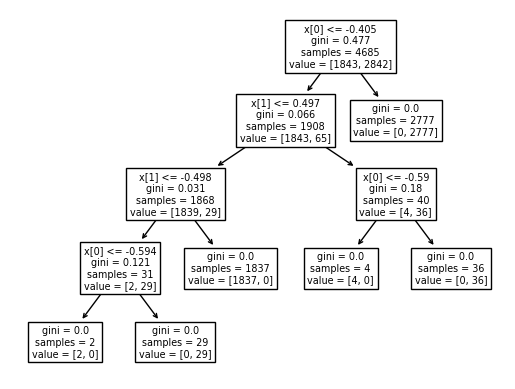

In [306]:
#visualize tree
tree.plot_tree(clf_ng)

In [307]:
#predict dataset
y_pred_ng = clf_ng.predict(X_test_ng)

WITH GEOMETRY INCLUDED

In [308]:
#splitting data into features and target variable
model_data = edge_joined_gdf[edge_joined_gdf.classification != 'Combined']
feature_cols = ['xacc', 'yacc', 'speed', 'maxspeed','lanecount','Shape__Length', 'distances']
X = model_data[feature_cols]
y = model_data['classification']

In [309]:
X

xacc   yacc  speed  maxspeed  lanecount  Shape__Length    distances
0    -0.622 -0.255     29        62          1    7952.344620     2.968227
1     1.394 -0.600     64        83          4    1205.945085     8.386962
2    -1.114  0.017     27        48          2      82.458588     2.518186
3    -0.976  0.396     17        22          1     529.443601     3.256400
4    -0.896  0.003     67        95          2    2983.355455     3.727888
...     ...    ...    ...       ...        ...            ...          ...
6694 -0.112 -0.421     94       101          1    5643.759615  3461.628936
6695 -0.078 -0.428     93       101          1    5643.759615  3439.161524
6696 -0.409 -0.058     87       104          1     374.539072  3386.242706
6697 -0.057 -0.404    107       113          2    5643.759615  3727.204652
6698 -0.180 -0.364     97        97          1     252.475125  2069.121185

[6741 rows x 7 columns]

In [310]:
y

0        Braking
1       Steering
2        Braking
3        Braking
4        Braking
          ...   
6694    Steering
6695    Steering
6696     Braking
6697    Steering
6698    Steering
Name: classification, Length: 6741, dtype: object

In [311]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [312]:
#create decision tree model
clf = DecisionTreeClassifier()

#train model
clf = clf.fit(X_train, y_train)

[Text(0.5769230769230769, 0.875, 'x[0] <= -0.442\ngini = 0.477\nsamples = 4718\nvalue = [1856, 2862]'),
 Text(0.3076923076923077, 0.625, 'x[1] <= 0.571\ngini = 0.03\nsamples = 1841\nvalue = [1813, 28]'),
 Text(0.15384615384615385, 0.375, 'x[1] <= -0.587\ngini = 0.014\nsamples = 1825\nvalue = [1812, 13]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 1812\nvalue = [1812, 0]'),
 Text(0.46153846153846156, 0.375, 'x[0] <= -0.614\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.8461538461538461, 0.625, 'x[0] <= -0.404\ngini = 0.029\nsamples = 2877\nvalue = [43, 2834]'),
 Text(0.7692307692307693, 0.375, 'x[3] <= 96.5\ngini = 0.499\nsamples = 89\nvalue = [43, 46]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.0\nsamples = 46\nvalue = [0, 46]'

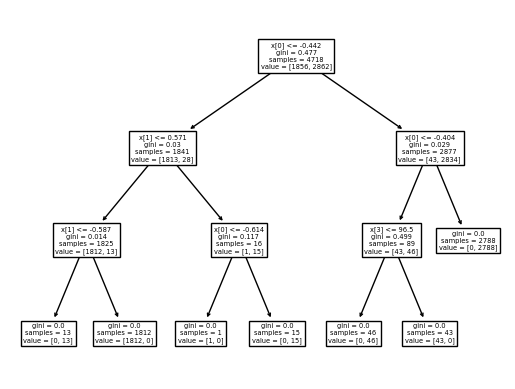

In [313]:
tree.plot_tree(clf)

In [314]:
#predict dataset
y_pred = clf.predict(X_test)

take off x and yacc to look (with and without geo)
w and wo geo pred %

feature importance - select important variables

>50% prediction - possible (w or wo x and y acc)
<50% prediction - impossible (w or wo x and y acc)

In [316]:
#without x and y acc (with geometry)
model_data_noXY = model_data.drop('xacc', axis=1)
model_data_noXY = model_data_noXY.drop('yacc', axis=1)
feature_cols = ['speed', 'maxspeed','lanecount','Shape__Length', 'distances']
X_noXY = model_data_noXY[feature_cols]
y_noXY = model_data_noXY['classification']

In [317]:
X_noXY

speed  maxspeed  lanecount  Shape__Length    distances
0        29        62          1    7952.344620     2.968227
1        64        83          4    1205.945085     8.386962
2        27        48          2      82.458588     2.518186
3        17        22          1     529.443601     3.256400
4        67        95          2    2983.355455     3.727888
...     ...       ...        ...            ...          ...
6694     94       101          1    5643.759615  3461.628936
6695     93       101          1    5643.759615  3439.161524
6696     87       104          1     374.539072  3386.242706
6697    107       113          2    5643.759615  3727.204652
6698     97        97          1     252.475125  2069.121185

[6741 rows x 5 columns]

In [318]:
y_noXY

0        Braking
1       Steering
2        Braking
3        Braking
4        Braking
          ...   
6694    Steering
6695    Steering
6696     Braking
6697    Steering
6698    Steering
Name: classification, Length: 6741, dtype: object

In [294]:
# Split dataset into training set and test set
X_train_nxy, X_test_nxy, y_train_nxy, y_test_nxy = train_test_split(X_noXY, y_noXY, test_size=0.3, random_state=1) # 70% training and 30% test

In [295]:
#create decision tree model
clf_noXY = DecisionTreeClassifier()

#train model
clf_noXY = clf_noXY.fit(X_train_nxy, y_train_nxy)

[Text(0.2935797543449198, 0.9814814814814815, 'x[0] <= 23.5\ngini = 0.477\nsamples = 4718\nvalue = [1856, 2862]'),
 Text(0.05362838915470494, 0.9444444444444444, 'x[0] <= 20.5\ngini = 0.158\nsamples = 865\nvalue = [790, 75]'),
 Text(0.021179285111173656, 0.9074074074074074, 'x[0] <= 11.5\ngini = 0.094\nsamples = 727\nvalue = [691, 36]'),
 Text(0.0060043156018388215, 0.8703703703703703, 'x[3] <= 1.255\ngini = 0.009\nsamples = 432\nvalue = [430, 2]'),
 Text(0.0030021578009194107, 0.8333333333333334, 'x[3] <= 1.214\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.0015010789004597054, 0.7962962962962963, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.004503236701379116, 0.7962962962962963, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.009006473402758232, 0.8333333333333334, 'x[3] <= 7.62\ngini = 0.005\nsamples = 400\nvalue = [399, 1]'),
 Text(0.007505394502298527, 0.7962962962962963, 'gini = 0.0\nsamples = 333\nvalue = [333, 0]'),
 Text(0.010507552303217938, 0.796296296

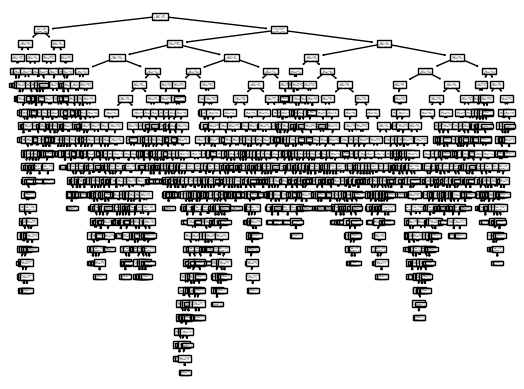

In [288]:
tree.plot_tree(clf_noXY)

In [296]:
#predict dataset
y_pred_noXY = clf_noXY.predict(X_test_nxy)

In [298]:
#withouy x and y (without geometry)
model_data_noxyg = model_data_no_geo.drop('xacc', axis=1)
model_data_noxyg = model_data_noxyg.drop('yacc', axis=1)
feature_cols = ['speed', 'maxspeed','lanecount']
X_noxyg = model_data_noxyg[feature_cols]
y_noxyg = model_data_noxyg['classification']

In [299]:
X_noxyg

speed  maxspeed  lanecount
0        29        62          1
1        64        83          4
2        27        48          2
3        17        22          1
4        67        95          2
...     ...       ...        ...
6694     94       101          1
6695     93       101          1
6696     87       104          1
6697    107       113          2
6698     97        97          1

[6693 rows x 3 columns]

In [300]:
y_noxyg

0        Braking
1       Steering
2        Braking
3        Braking
4        Braking
          ...   
6694    Steering
6695    Steering
6696     Braking
6697    Steering
6698    Steering
Name: classification, Length: 6693, dtype: object

In [319]:
# Split dataset into training set and test set
X_train_nxyg, X_test_nxyg, y_train_nxyg, y_test_nxyg = train_test_split(X_noxyg, y_noxyg, test_size=0.3, random_state=1) # 70% training and 30% test

In [320]:
#create decision tree model
clf_noxyg = DecisionTreeClassifier()

#train model
clf_noxyg = clf_noxyg.fit(X_train_nxyg, y_train_nxyg)

In [ ]:
tree.plot_tree(clf_noXY)

In [321]:
#predict dataset
y_pred_noxyg = clf_noxyg.predict(X_test_nxyg)

In [322]:
#comparison
#comparison
#accuracy
print("accuracy for with geo and with xy: ", metrics.accuracy_score(y_test, y_pred))
#accuracy
print("accuracy with no geo and with xy: ", metrics.accuracy_score(y_test_ng, y_pred_ng))
#accuracy
print("accuracy with geo and no xy: ", metrics.accuracy_score(y_test_nxy, y_pred_noXY))
#accuracy
print("accuracy with no geo and no xy: ", metrics.accuracy_score(y_test_nxyg, y_pred_noxyg))

accuracy for with geo and with xy:  0.9990113692535838
accuracy with no geo and with xy:  0.999003984063745
accuracy with geo and no xy:  0.8230350963914977
accuracy with no geo and no xy:  0.7788844621513944


test

In [232]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [233]:
#splitting data into features and target variable
feature_cols_no_geo = ['xacc', 'yacc', 'speed']
X_no_geo = model_data_no_geo[feature_cols_no_geo]
y_no_geo = label_encoder.fit_transform(model_data_no_geo['classification'])

In [235]:
# Split dataset into training set and test set
X_train_reg_ng, X_test_reg_ng, y_train_reg_ng, y_test_reg_ng = train_test_split(X_no_geo, y_no_geo, test_size=0.3, random_state=1) # 70% training and 30% test

In [236]:
#train
reg_ng_clf = tree.DecisionTreeRegressor()
reg_ng_clf.fit(X_train_reg_ng, y_train_reg_ng)

DecisionTreeRegressor()

In [237]:
X_test_ng

xacc   yacc  speed
1052 -0.187 -0.679     40
3768 -0.210  0.563     51
2394 -0.650 -0.029     42
4659 -0.632 -0.107     33
943   0.288 -0.666     58
...     ...    ...    ...
6159 -0.657 -0.254     42
953  -0.323 -0.648     33
5112 -0.002 -0.562     42
5970 -0.320  0.582     29
2142 -0.712  0.014     11

[2008 rows x 3 columns]

In [238]:
pred_array = reg_ng_clf.predict(X_test_ng)

predict distances instead of classification if use regression model

In [239]:
print("accuracy for with geo: ", metrics.accuracy_score(y_test_reg_ng, pred_array))

accuracy for with geo:  0.999003984063745
